In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def modulosum(x : int, y : int, m : int):
    """ This is function is a copy from the example uploaded to odtuclass,
        I only changed the assertions, and added type checking provided by python.
    """
    assert (x >= 0 and y >= 0)
    assert (x <= m-1 and y <= m-1)
    
    if (x <= m - 1 - y):
        return x + y
    else:
        return x- (m - y)
    
def lcg2(mod : int, m : int, a : int, seed : int):
    '''

            Parameters:
                    mod (int) : Modulo
                    m (int) : Multiplier
                    a (int) : Addition constant
                    seed (int) : Initial value

            Returns:
                    res (int): Returns the generated next random number.
    '''
    assert (mod >= 1)
    assert (0 <= m <= mod -1)
    assert (0 <= a <= mod -1)
    assert (0 <= seed <= mod -1)
    
    
    q = mod // m
    p = mod % m
    
    res = m * (seed % q) - p * (seed // q)

    if res < 0:
        res = res + mod
    
    res = modulosum(res,a,mod)
    
    return res
    
    
    

In [57]:
# These two functions have been taken from the example code in the odtuclass.

def lcgrandom(fun=lcg2, modulus=2**32-1, multiplier=367, increment=314, initval=1, num=1):
    # Check conditions
    assert(fun==lcg2)
    randlist = []; # Create an empty list to populate
    for ind in range(num):
        val = fun(modulus, multiplier, increment, initval)
        initval = val # Set the previous random number as the new seed
        randlist.append(val) # Append to the list
    return np.array(randlist)

def spectraltest(modulus=256, multiplier=21, increment=11, startingval=0, num=512, t=2):
    randlist = lcgrandom(lcg2, modulus, multiplier, increment, startingval, num)
    x = randlist[0::2]
    y = randlist[1::2]
    plt.plot(x, y, 'b.')
    plt.axis('square')
    plt.axis('tight')
    plt.show()
    return 0

In [94]:
def randomwalk(n : int, mod : int = 2**32-1, m : int = 367, a : int = 314, init : int = 1):
    ''' Walks through the random numbers as described in the homework. Uses lcg2 as number generator.
    
            Parameters:
                    n (int) : Number of steps considered
                    mod (int) : Modulo
                    m (int) : Multiplier
                    a (int) : Addition constant
                    seed (int) : Initial value

            Returns:
                    res (list, int): Returns the step sequence and the final destination in a tuple.
    '''
    assert (n > 0)
    
    r = lcg2(mod, m, a, init) #assertions done inside
    prev_r = r
    
    resultlist = []
    
    for i in range(n):
        r = lcg2(mod, m, a, r)
        
        if r > prev_r: resultlist.append(1)
        else: resultlist.append(-1)
        
        prev_r = r

    return resultlist, sum(resultlist)

Random Walk : [1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1]
Final Position : 2


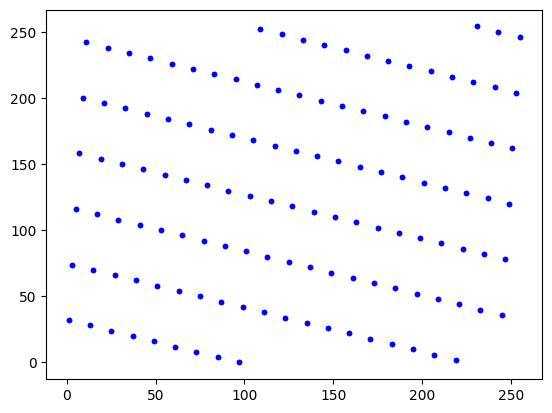

0

In [95]:
# Testing the functions.

ret, final = randomwalk(20)

print(f"Random Walk : {ret}")
print(f"Final Position : {final}")

spectraltest()